### Corona Virus Data Analyst March 2020

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

Resources : WHO

This data analysis is focused on data wrangling, data cleaning and data visulization of Corona Virus on 8th March 2020.

The dataset is derived from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE. 

Here is the link consisting of all datased regarding Coronavirus

https://github.com/CSSEGISandData/COVID-19

1 - Determine which libraries is used for dataset

In [39]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
%matplotlib inline

2 - Load data from csv file defined in the link repository

In [40]:
dataset_date = "03-13-2020.csv"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dataset_date

corona_data_df = pd.read_csv(url, error_bad_lines=False,encoding = "utf-8")

3 - Get first 5 values from dataframe whose name is corona_data_df

In [41]:
corona_data_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-13T11:09:03,67786,3062,51553,30.9756,112.2707
1,Guangdong,China,2020-03-13T11:09:03,1356,8,1296,23.3417,113.4244
2,Henan,China,2020-03-11T08:13:09,1273,22,1249,33.8820,113.6140
3,Zhejiang,China,2020-03-12T01:33:02,1215,1,1197,29.1832,120.0934
4,Hunan,China,2020-03-13T11:09:03,1018,4,1005,27.6104,111.7088


4 - Get last 5 values from corona_data_df dataframe

In [42]:
corona_data_df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
225,NaN,Afghanistan,2020-03-11T20:00:00,7,0,0,33.0000,65.0000
226,NaN,Monaco,2020-03-11T20:00:00,2,0,0,43.7333,7.4167
227,NaN,Liechtenstein,2020-03-11T20:00:00,1,0,0,47.1400,9.5500
228,NaN,Guyana,2020-03-11T20:00:00,1,1,0,5.0000,-58.7500
229,NaN,Taiwan*,2020-03-11T20:00:00,50,1,20,23.7000,121.0000


5 - Show descriptive statistics of corona_data_df dataframe

In [43]:
corona_data_df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,230.000000,230.000000,230.00000,230.000000,230.000000
mean,631.273913,23.495652,305.43913,29.436507,8.032134
std,4710.064350,220.633482,3406.53904,22.075653,84.419842
min,0.000000,0.000000,0.00000,-41.454500,-157.498337
25%,5.000000,0.000000,0.00000,21.189113,-75.384156
50%,22.000000,0.000000,0.00000,35.597704,12.512600
75%,109.250000,1.000000,4.75000,43.612698,90.414275
max,67786.000000,3062.000000,51553.00000,64.963100,174.886000


6 - Determine how many rows and columns there are in corona_data_df dataframe

In [44]:
corona_data_df_count_row = corona_data_df.shape[0]  # gives number of row count
corona_data_df_count_col = corona_data_df.shape[1]  # gives number of col count
print("Corona Dataset : {} rows and {} columns "
      .format(corona_data_df_count_row,corona_data_df_count_col))

Corona Dataset : 230 rows and 8 columns 


7 - Show data type of each column in corona_data_df dataframe

In [45]:
corona_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 8 columns):
Province/State    113 non-null object
Country/Region    230 non-null object
Last Update       230 non-null object
Confirmed         230 non-null int64
Deaths            230 non-null int64
Recovered         230 non-null int64
Latitude          230 non-null float64
Longitude         230 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 14.5+ KB


8 - Determine how many null values there are in corona_data_df dataframe

In [46]:
pd.isna(corona_data_df).sum()

Province/State    117
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

9 - Determine how many people were confirm from Corona Virus in terms of their countries

In [47]:
corona_data_df_corfirmed = corona_data_df.groupby(['Country/Region'])['Confirmed'].sum()

10 - Determine how many people were dead from Corona Virus in terms of their countries

In [48]:
corona_data_df_deaths = corona_data_df.groupby(['Country/Region'])['Deaths'].sum()

11 - Determine how many people were recovered from Corona Virus in terms of their countries

In [49]:
corona_data_df_recovered = corona_data_df.groupby(['Country/Region'])['Recovered'].sum()

12 - Determine which 20 most-affected countries or regions were confirmed Corona Virus cases 

In [50]:
df_confirmed = corona_data_df_corfirmed.sort_values(ascending=False).head(20)

13 - Determine which 20 most-affected countries their people were death from Corona virus

In [51]:
df_deaths = corona_data_df_deaths.sort_values(ascending=False).head(20)

14 - Determine which 20 most-affected countries their people were recovered from Corona virus

In [52]:
df_recovered = corona_data_df_recovered.sort_values(ascending=False).head(20)

15 - Convert all results to dataframe

In [53]:
df_confirmed = df_confirmed.reset_index()

In [54]:
df_deaths = df_deaths.reset_index()

In [55]:
df_recovered = df_recovered.reset_index()

15 - Show a figure regarding how many people were confirmed from Corona Virus in 20 most-affected countries or regions

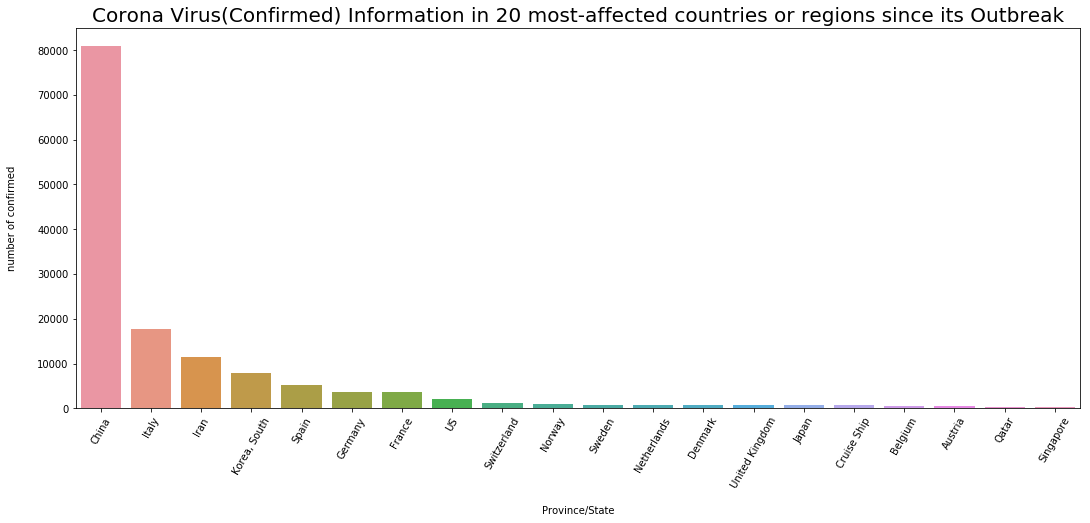

In [56]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Confirmed" ,
            data = df_confirmed )
plt.title('Corona Virus(Confirmed) Information in 20 most-affected countries or regions since its Outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('13-03-2020/image1.png')
plt.savefig('13-03-2020/image1.pdf')

16 - Show a figure regarding how many people were dead from Corona Virus in 20 most-affected countries or regions

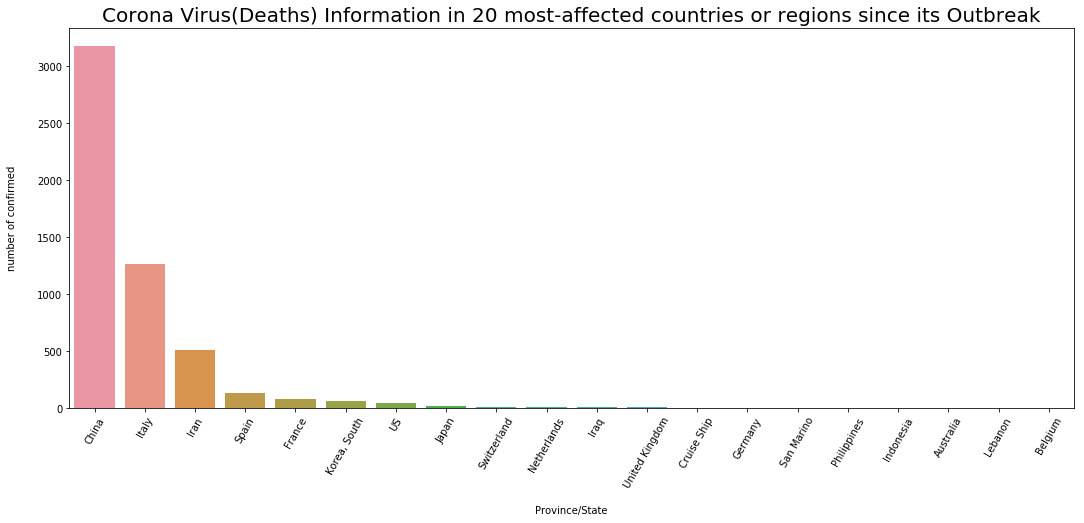

In [57]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Deaths" ,
            data = df_deaths )
plt.title('Corona Virus(Deaths) Information in 20 most-affected countries or regions since its Outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('13-03-2020/image2.png')
plt.savefig('13-03-2020/image2.pdf')

17 - Show a figure regarding how many people were recovered from Corona Virus in 20 most-affected countries or regions

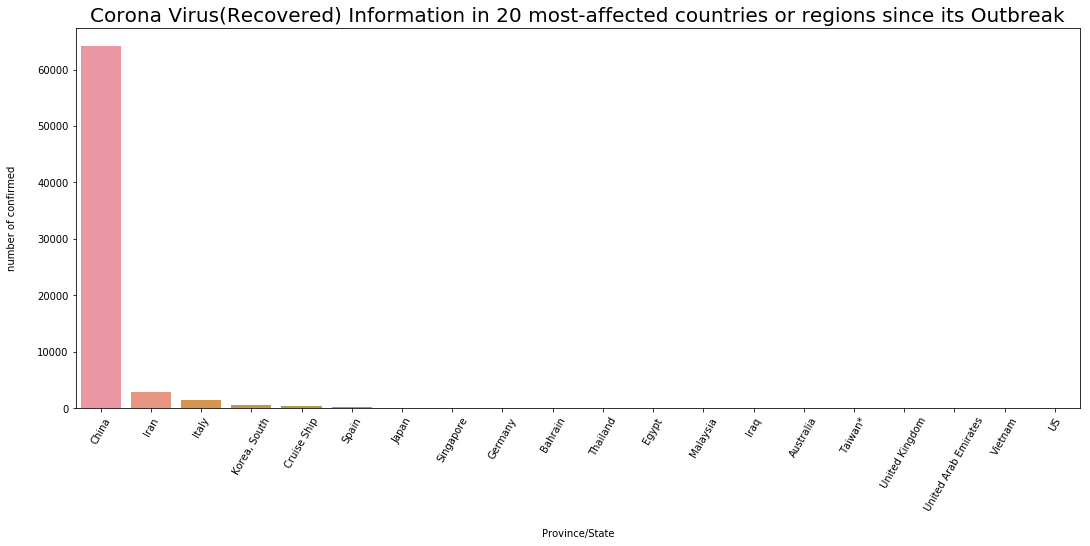

In [58]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Recovered" ,
            data = df_recovered )
plt.title('Corona Virus(Recovered) Information in 20 most-affected countries or regions since its Outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('13-03-2020/image3.png')
plt.savefig('13-03-2020/image3.pdf')

In [59]:
corona_data_df_total = corona_data_df[['Confirmed','Recovered','Deaths']].sum()

In [60]:
corona_data_df_total = corona_data_df_total.reset_index()

In [61]:
corona_data_df_total

,index,0
0,Confirmed,145193
1,Recovered,70251
2,Deaths,5404


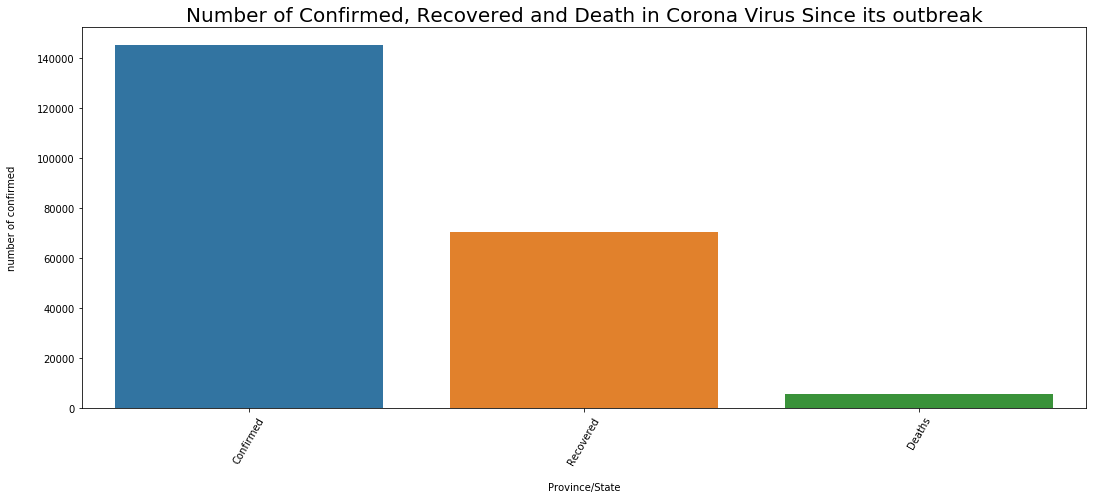

In [62]:
plt.figure(figsize=(18,7))
sns.barplot(x = "index", y = 0,  
            data = corona_data_df_total )
plt.title('Number of Confirmed, Recovered and Death in Corona Virus Since its outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('13-03-2020/image4.png')
plt.savefig('13-03-2020/image4.pdf')